In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
import nltk
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder 
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import tensorflow as tf
import numpy as np
from tabulate import tabulate
from tqdm import trange
import random
model_name = 'bert-base-uncased'
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer = BertTokenizer.from_pretrained(model_name)


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architect

In [3]:
df = pd.read_csv("dementia.csv")
df.head()

Title  \
0  Implant-supported denture in a patient with Hu...   
1  Surgical correction of the snout suffocation s...   
2  Diabetes, Edentulism, and Cognitive Decline: A...   
3  Tooth loss and dementia amongst older adults r...   
4  Ethnicity, Social, and Clinical Risk Factors t...   

                                             Authors  \
0  J Jackowski; J Andrich; H Käppeler; A Zöllner;...   
1                            V L Keipper; P G Chikes   
2  B Wu; H Luo; C Tan; X Qi; F A Sloan; A R Kamer...   
3       Joon-Ho Yoon; Nicholas Tong; Chris C L Wyatt   
4  Haeok Lee; Deogwoon Kim; Andrew Jung; Wonjeong...   

                                             Journal  \
0  Special care in dentistry : official publicati...   
1    Archives of otolaryngology--head & neck surgery   
2                         Journal of dental research   
3                                      Gerodontology   
4  International journal of environmental researc...   

                                                 DOI  \
0                 10.1111/j.1754-4505.2001.tb00218.x   
1               10.1001/archotol.1990.01870040082018   
2                          10.1177/00220345231155825   
3                                  10.1111/ger.12677   
4  10.3390/ijerph19042382\n10.1177/23800844177147...   

                                            Keywords  \
0                                                NaN   
1                                                NaN   
2  cohort studies; dental health; epidemiology; g...   
3  ageing; dementia; geriatric dentistry; long-te...   
4  dementia; ethnicity; health disparities; older...   

                                            Abstract  Label  
0  Patients with extrapyramidal diseases often ca...      1  
1  Two nursing home patients with difficulty brea...      1  
2  Diabetes mellitus (DM) is a recognized risk fa...      0  
3  The purpose of this case-control study was to ...      0  
4  Many older adults suffer from poor oral health...      0

In [9]:
df.head()

Title  \
0  Implant-supported denture in a patient with Hu...   
1  Surgical correction of the snout suffocation s...   
2  Diabetes, Edentulism, and Cognitive Decline: A...   
3  Tooth loss and dementia amongst older adults r...   
4  Ethnicity, Social, and Clinical Risk Factors t...   

                                            Abstract  Label  
0  Patients with extrapyramidal diseases often ca...      1  
1  Two nursing home patients with difficulty brea...      1  
2  Diabetes mellitus (DM) is a recognized risk fa...      0  
3  The purpose of this case-control study was to ...      0  
4  Many older adults suffer from poor oral health...      0

In [10]:
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)
df.rename(columns = {"Title":"text", "Abstract":"text2", 'Label' : 'label'},inplace = True)
df

text  \
0   Implant-supported denture in a patient with Hu...   
1   Surgical correction of the snout suffocation s...   
2   Diabetes, Edentulism, and Cognitive Decline: A...   
3   Tooth loss and dementia amongst older adults r...   
4   Ethnicity, Social, and Clinical Risk Factors t...   
5   The prospective association between periodonta...   
6     The impact of tooth loss on cognitive function.   
7   Association between cognitive health and masti...   
8   Effects of tooth loss on brain structure: a vo...   
9   Evidence summary: the relationship between ora...   
10  Oral Health Status Is Associated with Common M...   
11  Complete Edentulism and Comorbid Diseases: An ...   
12  Oral health status in relation to cognitive fu...   
13  Clinical evaluation of the oral health status ...   
14  Association between tooth loss and the develop...   
15  Cognitive decline and oral health in middle-ag...   
16  Oral health status of elderly hospitalised psy...   
17  Nutritional status and oral status of the elde...   
18  Edentulism and dental caries in Victorian nurs...   
19  Relationship of tooth loss to mild memory impa...   

                                                text2  label  
0   Patients with extrapyramidal diseases often ca...      1  
1   Two nursing home patients with difficulty brea...      1  
2   Diabetes mellitus (DM) is a recognized risk fa...      0  
3   The purpose of this case-control study was to ...      0  
4   Many older adults suffer from poor oral health...      0  
5   We investigate if periodontal disease is prosp...      0  
6   To investigate if there is epidemiological evi...      0  
7   Cognitive health is subject to decline with in...      0  
8   One of the most prominent issues in a super-ag...      0  
9   This is the fourth and final paper of a series...      0  
10  To investigate oral health status and abnormal...      0  
11  The relationship between complete edentulism, ...      0  
12  Epidemiologic data examining the relationship ...      0  
13  The aim of this study was to evaluate the oral...      0  
14  Tooth loss may be a modifiable risk factor for...      0  
15  Even before dementia becomes apparent, cogniti...      0  
16  This study investigated the oral health status...      0  
17  To determine the relationship between denture ...      0  
18  The aim of this project was to investigate ede...      0  
19  This cross-sectional study investigated the re...      0

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df['text'].astype(str) + ' ' + df['text2'].astype(str)
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(text))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
#lowercase, remove special characters

def cleansing(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'/(?<!\S).(?!\S)\s*/', '', text)
    return text

In [15]:
df['text'] = df['text'].apply(cleansing)
df['text2'] = df['text2'].apply(cleansing)
df.head()


text  \
0  implantsupported denture in a patient with hun...   
1  surgical correction of the snout suffocation s...   
2  diabetes edentulism and cognitive decline a  p...   
3  tooth loss and dementia amongst older adults r...   
4  ethnicity social and clinical risk factors to ...   

                                               text2  label  
0  patients with extrapyramidal diseases often ca...      1  
1  two nursing home patients with difficulty brea...      1  
2  diabetes mellitus dm is a recognized risk fact...      0  
3  the purpose of this casecontrol study was to d...      0  
4  many older adults suffer from poor oral health...      0

In [16]:
#remove stopwords 
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['text2'] = df['text2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

text  \
0  implantsupported denture patient huntingtons d...   
1     surgical correction snout suffocation syndrome   
2  diabetes edentulism cognitive decline prospect...   
3  tooth loss dementia amongst older adults resid...   
4  ethnicity social clinical risk factors tooth l...   

                                               text2  label  
0  patients extrapyramidal diseases often cannot ...      1  
1  two nursing home patients difficulty breathing...      1  
2  diabetes mellitus dm recognized risk factor de...      0  
3  purpose casecontrol study determine associatio...      0  
4  many older adults suffer poor oral health incl...      0

In [17]:
X = df[['text', 'text2']] 
y = df['label']  

#label encoder
label_encoder = LabelEncoder()
X['text'] = label_encoder.fit_transform(X['text'])
X['text2'] = label_encoder.fit_transform(X['text2'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (16, 2) (16,)
Test set shape: (4, 2) (4,)


C:\Users\User\AppData\Local\Temp\ipykernel_25692\3158477982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text'] = label_encoder.fit_transform(X['text'])
C:\Users\User\AppData\Local\Temp\ipykernel_25692\3158477982.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['text2'] = label_encoder.fit_transform(X['text2'])


In [18]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
import torch

class CustomDataset(Dataset):
    def __init__(self, texts, text2s, labels):
        self.texts = texts
        self.text2s = text2s
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        text = self.texts[index]
        text2 = self.text2s[index]
        label = self.labels[index]
        return text, text2, label


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

#tokenize and put into tensors
def tokenize_function(texts, text2s):
    inputs = tokenizer.batch_encode_plus(
        list(zip(texts, text2s)),
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return inputs

train_texts = df['text'].tolist()
train_text2s = df['text2'].tolist()
train_labels = df['label'].tolist()

train_texts = [str(text) for text in train_texts]
train_text2s = [str(text2) for text2 in train_text2s]

train_dataset = CustomDataset(train_texts, train_text2s, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

early_stopping_epochs = 4
best_loss = float('inf')
best_model = None
epochs_without_improvement = 0

model.train()
for epoch in range(6):
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    for step, batch in enumerate(train_dataloader):
        texts, text2s, labels = batch

        inputs = tokenize_function(texts, text2s)
        inputs = {key: val.to(device) for key, val in inputs.items()}
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        total_loss += loss.item()

        _, predicted_labels = torch.max(logits, dim=1)
        correct_predictions += torch.sum(predicted_labels == labels).item()
        total_predictions += labels.size(0)

        loss.backward()
        optimizer.step()

        if (step + 1) % 100 == 0:
            accuracy = correct_predictions / total_predictions
            avg_loss = total_loss / (step + 1)
            print(f'Step {step + 1} - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}')

    accuracy = correct_predictions / total_predictions
    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1} - Average Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}')

    # check if validation loss has improved
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_model = model.state_dict()
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    # stop training if there have been no improvements for each epochs
    if epochs_without_improvement >= early_stopping_epochs:
        print(f'Early stopping. No improvement in {early_stopping_epochs} epochs.')
        break

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1 - Average Loss: 0.9567 - Accuracy: 0.1000
Epoch 2 - Average Loss: 0.6611 - Accuracy: 0.5500
Epoch 3 - Average Loss: 0.3557 - Accuracy: 0.9000
Epoch 4 - Average Loss: 0.2723 - Accuracy: 0.9000
Epoch 5 - Average Loss: 0.2220 - Accuracy: 0.9000
Epoch 6 - Average Loss: 0.2480 - Accuracy: 0.9000


In [19]:
from sklearn.metrics import classification_report

model.eval()
y_true = []
y_pred = []

for step, batch in enumerate(train_dataloader):
    texts, text2s, labels = batch

    inputs = tokenize_function(texts, text2s)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(**inputs, labels=labels)
        logits = outputs.logits

    _, predicted_labels = torch.max(logits, dim=1)

    y_true.extend(labels.detach().cpu().numpy())
    y_pred.extend(predicted_labels.detach().cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.50      0.67         2

    accuracy                           0.95        20
   macro avg       0.97      0.75      0.82        20
weighted avg       0.95      0.95      0.94        20



Text(50.722222222222214, 0.5, 'Truth')

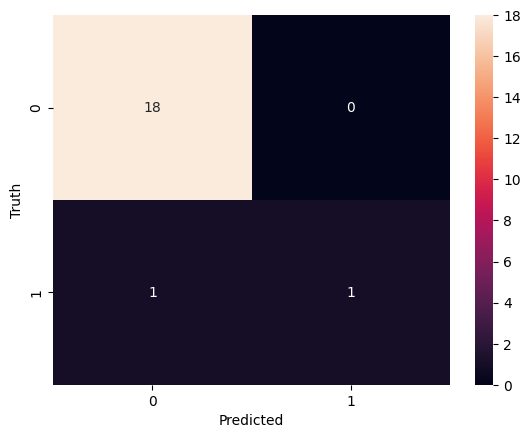

In [20]:
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')